# ZINC reference database analysis

In [1]:
#Libraries
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*') 

In [2]:
#Loading coconut database from sdf format
coco = Chem.SDMolSupplier('COCONUT_DB.sdf')
coco_d = [m for m in coco if m]

In [12]:
#Loading zinc database from csv 
suppl_csv = pd.read_csv('ZINC_csv/ZINC3.csv', delimiter = ' ')
suppl_csv1 = suppl_csv[suppl_csv.zinc_id != 'zinc_id']
suppl_csv1
#suppl_csv1.drop(suppl_csv.tail(1).index,inplace=True)

,Smiles,zinc_id
0,O=C1N[C@@H](O)[C@@H](O)N1,18258078
1,C[C@@](N)(CN)C(=O)O,34732614
2,N=C(N)NCCC[C@@H](N)C(=O)O,1532749
3,NNc1nc(NN)nc(NN)n1,4530618
4,CS(=O)(=O)N1CC2(CNC2)C1,96509193
...,...,...
438759,COc1ccc(-n2c(SCC(=O)Nc3cccc(C(C)=O)c3)nc3c(-c4...,245015144
438760,COc1ccc(/C=c2/sc3n(c2=O)[C@@H](c2cccs2)C(C(=O)...,8455166
438761,CCOC(=O)c1c(NC(=O)c2cc(-c3ccc4c(c3)OCO4)nc3ccc...,2086523
438762,COc1ccc(NC2=Nc3ccccc3N3C2=Nc2c(c(C)nn2-c2ccccc...,102450185


In [13]:
#Number of zinc products
len(suppl_csv1)

438752

In [14]:
#Check duplicates in ZINC dataframe
ids = suppl_csv1['zinc_id']
suppl_csv1[ids.isin(ids[ids.duplicated()])].sort_values('zinc_id')
#Drop duplicates
suppl_csv1 = suppl_csv1.drop_duplicates(subset=['zinc_id'])
suppl_csv1

,Smiles,zinc_id
0,O=C1N[C@@H](O)[C@@H](O)N1,18258078
1,C[C@@](N)(CN)C(=O)O,34732614
2,N=C(N)NCCC[C@@H](N)C(=O)O,1532749
3,NNc1nc(NN)nc(NN)n1,4530618
4,CS(=O)(=O)N1CC2(CNC2)C1,96509193
...,...,...
438759,COc1ccc(-n2c(SCC(=O)Nc3cccc(C(C)=O)c3)nc3c(-c4...,245015144
438760,COc1ccc(/C=c2/sc3n(c2=O)[C@@H](c2cccs2)C(C(=O)...,8455166
438761,CCOC(=O)c1c(NC(=O)c2cc(-c3ccc4c(c3)OCO4)nc3ccc...,2086523
438762,COc1ccc(NC2=Nc3ccccc3N3C2=Nc2c(c(C)nn2-c2ccccc...,102450185


In [15]:
# List of molecular weights of zinc products
ligandm_database = []
for ligand in suppl_csv1["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))
#List of MW from csv
db_MW_z = []
for substance in ligandm_database:
		db_MW_z.append(rdescriptors.CalcExactMolWt(substance))
print(len(db_MW_z))
#List of logP from csv
db_logP_z = []
for substance in ligandm_database:
		db_logP_z.append(Descriptors.MolLogP(substance))
print(len(db_logP_z))
#List of INCHI from csv
db_Inchi_z = []
for substance in ligandm_database:
		db_Inchi_z.append(Chem.MolToInchi((substance)))
print(len(db_Inchi_z))


398285
398285
398285


In [31]:
#Creating dataframe of logP and MW value of ZINC products
df_ZINC = pd.DataFrame(data={'MW': db_MW_z,'logP': db_logP_z, 'Smiles': suppl_csv1['Smiles'], 'Inchi': db_Inchi_z})
                    
df_ZINC['name'] = "ZINC"
df_ZINC

,MW,logP,Smiles,Inchi,name
0,118.037842,-2.06400,O=C1N[C@@H](O)[C@@H](O)N1,"InChI=1S/C3H6N2O3/c6-1-2(7)5-3(8)4-1/h1-2,6-7H...",ZINC
1,118.074228,-1.25290,C[C@@](N)(CN)C(=O)O,"InChI=1S/C4H10N2O2/c1-4(6,2-5)3(7)8/h2,5-6H2,1...",ZINC
2,174.111676,-1.33843,N=C(N)NCCC[C@@H](N)C(=O)O,InChI=1S/C6H14N4O2/c7-4(5(11)12)2-1-3-10-6(8)9...,ZINC
3,171.098091,-2.27160,NNc1nc(NN)nc(NN)n1,InChI=1S/C3H9N9/c4-10-1-7-2(11-5)9-3(8-1)12-6/...,ZINC
4,176.061949,-1.14880,CS(=O)(=O)N1CC2(CNC2)C1,"InChI=1S/C6H12N2O2S/c1-11(9,10)8-4-6(5-8)2-7-3...",ZINC
...,...,...,...,...,...
438759,524.151826,5.32280,COc1ccc(-n2c(SCC(=O)Nc3cccc(C(C)=O)c3)nc3c(-c4...,InChI=1S/C29H24N4O4S/c1-18(34)20-9-6-10-21(15-...,ZINC
438760,679.122261,6.38782,COc1ccc(/C=c2/sc3n(c2=O)[C@@H](c2cccs2)C(C(=O)...,InChI=1S/C34H25F4N3O4S2/c1-17-7-4-5-8-23(17)40...,ZINC
438761,556.203193,7.27200,CCOC(=O)c1c(NC(=O)c2cc(-c3ccc4c(c3)OCO4)nc3ccc...,InChI=1S/C32H32N2O5S/c1-5-37-31(36)28-21-12-11...,ZINC
438762,550.134258,7.69952,COc1ccc(NC2=Nc3ccccc3N3C2=Nc2c(c(C)nn2-c2ccccc...,InChI=1S/C30H23ClN6OS/c1-18-26-27(25-13-8-16-3...,ZINC


In [33]:
#Statistic of ZINC'S logP values
df_ZINC["logP"].describe()

count    398285.000000
mean          3.143991
std           2.327206
min         -17.490700
25%           1.714500
50%           3.167900
75%           4.757400
max          21.151800
Name: logP, dtype: float64

In [34]:
#Standard deviation of logP
df_ZINC["logP"].std()

2.327205797072416

In [35]:
#Statistic of ZINC'S MW values
df_ZINC["MW"].describe()

count    398285.000000
mean        413.713272
std         131.675036
min          52.006148
25%         318.230728
50%         408.216141
75%         507.128215
max        1045.534515
Name: MW, dtype: float64

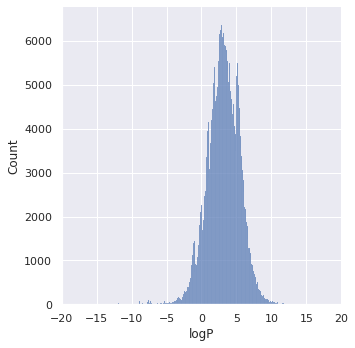

In [36]:
#Histogram of logP value of products
sns.displot(df_ZINC, x="logP" )
plt.xlim(-20, 20);

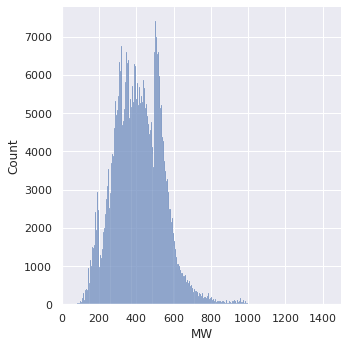

In [37]:
#Histogram of MW value of products
sns.displot(df_ZINC, x="MW" )
plt.xlim(0, 1500);

<AxesSubplot:>

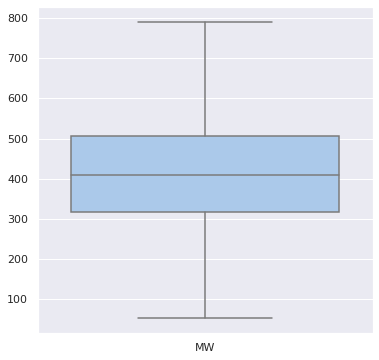

In [38]:
#Boxplot of ZINC'S MW values
sns.set(rc={'figure.figsize':(6, 6)})
sns.boxplot(data=df_ZINC[['MW']], 
            palette = "pastel", 
            
            showfliers = False)

<AxesSubplot:>

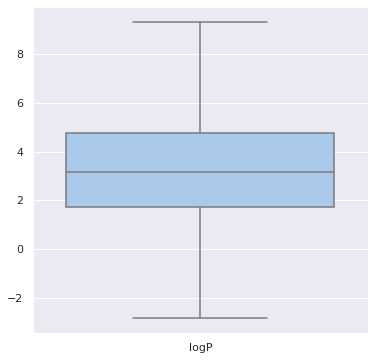

In [39]:
#Boxplot of ZINC'S logP values
sns.set(rc={'figure.figsize':(6, 6)})
sns.boxplot(data=df_ZINC[['logP']], 
            palette = "pastel", 
            showfliers = False)

In [40]:
print(len(df_ZINC))

398285


In [41]:
print(len(df_ZINC.loc[(df_ZINC['MW'] > 200) & (df_ZINC['MW']<=250)]))

19775


In [42]:

intervals = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
numbers = []
for count, value in enumerate(intervals):
    numbers.append(len(df_ZINC.loc[(df_ZINC['MW'] > intervals[count][0]) & (df_ZINC['MW']<= intervals[count][1])]))
numbers

[20722, 19775, 38544, 28668, 26963, 26906, 27768, 27638, 26093, 44389, 110819]

In [43]:
intervals_MW = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
intervals_logP = (-34,-1),(-1,0),(0,1),(1,2),(2,2.5),(2.5,3),(3,3.5),(3.5,4),(4,4.5),(4.5,5),(5, 50)
names = ['MW_0-200','MW_200-250','MW_250-300','MW_300-325','MW_325-350','MW_350-375','MW_375-400','MW_400-425','MW_425-450','MW_450-500','MW_500-3500']


def MW(intervals):
    return df_ZINC.loc[(df_ZINC['MW'] > intervals[0]) & (df_ZINC['MW'] <= intervals[1])]  

df_MW_0_200 = MW([0,200])
df_MW_200_250 = MW([200,250])
df_MW_250_300 = MW([250,300])
df_MW_300_325 = MW([300,325])
df_MW_325_350 = MW([325,350])
df_MW_350_375 = MW([350,375])
df_MW_375_400 = MW([375,400])
df_MW_400_425 = MW([400,425])
df_MW_425_450 = MW([425,450])
df_MW_450_500 = MW([450,500])
df_MW_500_3500 = MW([500,3500])


In [44]:
intervals_MW = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
intervals_logP = (-34,-1),(-1,0),(0,1),(1,2),(2,2.5),(2.5,3),(3,3.5),(3.5,4),(4,4.5),(4.5,5),(5, 50)

def logP(df):
    num = []
    for count, value in enumerate(intervals_logP):
        num.append(len(df.loc[(df['logP'] > intervals_logP[count][0]) & (df['logP']<= intervals_logP[count][1])]))
    return num
    
df_logP_1 = logP(df_MW_0_200)
df_logP_2 = logP(df_MW_200_250)
df_logP_3 = logP(df_MW_250_300)
df_logP_4 = logP(df_MW_300_325) 
df_logP_5 = logP(df_MW_325_350)
df_logP_6 = logP(df_MW_350_375) 
df_logP_7 = logP(df_MW_375_400)
df_logP_8 = logP(df_MW_400_425) 
df_logP_9 = logP(df_MW_425_450)
df_logP_10 = logP(df_MW_450_500) 
df_logP_11 = logP(df_MW_500_3500)
numbers

[20722, 19775, 38544, 28668, 26963, 26906, 27768, 27638, 26093, 44389, 110819]

In [45]:
my_array =np.stack([df_logP_1, df_logP_2, df_logP_3,df_logP_4,df_logP_5,df_logP_6,df_logP_7,df_logP_8,df_logP_9,df_logP_10, df_logP_11], axis=1)

In [46]:
df_array = pd.DataFrame(my_array, columns = ['200','250','300','325','350','375','400','425', '450','500','>500'],
                        index=['-1', '0','1','2','2.5','3','3.5','4','4.5','5','>5'])
df_array

,200,250,300,325,350,375,400,425,450,500,>500
-1,1588,333,1401,999,1100,1100,819,895,831,1487,6179
0,2226,1201,1400,1199,1000,1000,949,921,927,1588,4334
1,5032,2503,3999,2498,2001,1999,1749,1603,1524,2408,7430
2,5852,4800,7994,4800,4006,4000,3533,2995,2191,3232,8827
2.5,2443,75,5002,3095,3000,3004,2605,2307,1696,2215,4938
3,1850,3402,5001,3394,3802,3801,3145,2742,2069,3007,5629
3.5,1039,2604,5003,3003,3213,3214,3255,2983,2488,3532,6054
4,429,2202,3004,3202,2712,2691,2968,2945,2617,3765,6166
4.5,183,1404,2022,2687,2003,1997,2646,2703,2605,4078,6513
5,62,851,1408,1797,1808,1800,1970,2520,2316,3999,6395


In [47]:
# List of molecular weights of natural products
db_mw = []
for substance in coco_d:
		db_mw.append(rdescriptors.CalcExactMolWt(substance))

In [4]:
# List of molecular octanol-water partition coefficient
db_logP = []
for substance in coco_d:
		db_logP.append(Descriptors.MolLogP(substance))

In [5]:
#List of smiles
db_smiles = []
for substance in coco_d:
		db_smiles.append(Chem.MolToSmiles(substance))

In [6]:
#List of Inchi
db_Inchi = []
for substance in coco_d:
		db_Inchi.append(substance.GetProp('inchi'))

In [7]:
#Creating dataframe of logP and MW value of COCONUT products
df_COCO = pd.DataFrame(data={'MW': db_mw,'logP': db_logP , 'Smiles': db_smiles, 'Inchi': db_Inchi})
df_COCO['name'] = "COCO"
df_COCO

,MW,logP,Smiles,Inchi,name
0,660.183639,-2.08210,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,InChI=1S/C27H36N2O15S/c1-5-12(29-9-45)26(37)44...,COCO
1,598.183897,3.63422,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C34H30O10/c1-14-10-16-24(21(11-14)42-...,COCO
2,554.157682,3.32262,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C32H26O9/c1-13-9-16-24(20(10-13)39-2)...,COCO
3,534.298139,6.87940,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,"InChI=1S/C33H42O6/c1-31(2,3)30(36)37-18-17-33(...",COCO
4,540.142032,3.01962,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,InChI=1S/C31H24O9/c1-12-8-15-23(20(9-12)39-2)3...,COCO
...,...,...,...,...,...
405955,216.078644,2.75660,COc1cccc2ccc(C(C)=O)c(O)c12,InChI=1S/C13H12O3/c1-8(14)10-7-6-9-4-3-5-11(16...,COCO
405956,570.188983,4.77902,COc1cc(OC)c2c(c1)C(OC)(c1ccc3c(c1O)C(=O)c1c(O)...,InChI=1S/C33H30O9/c1-14-9-19-26(23(34)10-14)32...,COCO
405957,420.157288,4.82510,CC1(C)C=Cc2cc(C3COc4c5c(cc(O)c4C3=O)OC(C)(C)C=...,InChI=1S/C25H24O6/c1-24(2)7-5-13-9-15(17(26)10...,COCO
405958,1183.685261,-1.20930,CCCCCCCC1CC(=O)NC(CO)C(=O)NC(CO)C(=O)N2CCCC2C(...,InChI=1S/C58H93N11O15/c1-8-11-12-13-14-17-37-2...,COCO


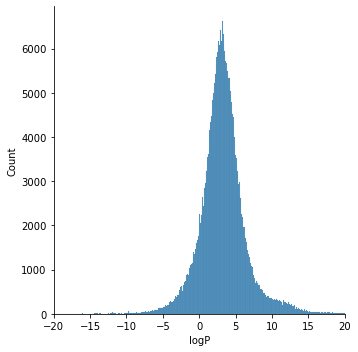

In [8]:
#Histogram of logP value of products
sns.displot(df_COCO, x="logP" )
plt.xlim(-20, 20);

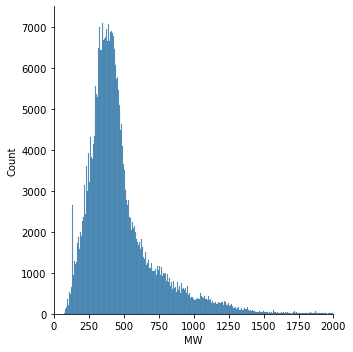

In [9]:
#Histogram of MW value of products
sns.displot(df_COCO, x="MW" )
plt.xlim(0, 2000);

In [48]:
#Join ZINC and COCONUT data
df_merge = pd.concat([df_COCO,df_ZINC], axis=0)
df_merge

,MW,logP,Smiles,Inchi,name
0,660.183639,-2.08210,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,InChI=1S/C27H36N2O15S/c1-5-12(29-9-45)26(37)44...,COCO
1,598.183897,3.63422,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C34H30O10/c1-14-10-16-24(21(11-14)42-...,COCO
2,554.157682,3.32262,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,InChI=1S/C32H26O9/c1-13-9-16-24(20(10-13)39-2)...,COCO
3,534.298139,6.87940,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,"InChI=1S/C33H42O6/c1-31(2,3)30(36)37-18-17-33(...",COCO
4,540.142032,3.01962,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,InChI=1S/C31H24O9/c1-12-8-15-23(20(9-12)39-2)3...,COCO
...,...,...,...,...,...
438759,524.151826,5.32280,COc1ccc(-n2c(SCC(=O)Nc3cccc(C(C)=O)c3)nc3c(-c4...,InChI=1S/C29H24N4O4S/c1-18(34)20-9-6-10-21(15-...,ZINC
438760,679.122261,6.38782,COc1ccc(/C=c2/sc3n(c2=O)[C@@H](c2cccs2)C(C(=O)...,InChI=1S/C34H25F4N3O4S2/c1-17-7-4-5-8-23(17)40...,ZINC
438761,556.203193,7.27200,CCOC(=O)c1c(NC(=O)c2cc(-c3ccc4c(c3)OCO4)nc3ccc...,InChI=1S/C32H32N2O5S/c1-5-37-31(36)28-21-12-11...,ZINC
438762,550.134258,7.69952,COc1ccc(NC2=Nc3ccccc3N3C2=Nc2c(c(C)nn2-c2ccccc...,InChI=1S/C30H23ClN6OS/c1-18-26-27(25-13-8-16-3...,ZINC


In [53]:
#Check dplicate in both dataframes by Inchi
ids = df_merge['Inchi']
df_merge = df_merge[ids.isin(ids[ids.duplicated()])].sort_values('Inchi')
df_merge

,MW,logP,Smiles,Inchi,name


In [65]:
#Let's split the dataframe into intervals
intervals = (0,200),(200,250),(250,300),(300,325),(325,350),(350,375),(375,400),(400,425),(425,450),(450,500),(500, 3500)
numbers_coco = []
for count, value in enumerate(intervals):
    numbers_coco.append(len(df_COCO.loc[(df_COCO['MW'] > intervals[count][0]) & (df_COCO['MW']<= intervals[count][1])]))
numbers_coco


[20733, 23172, 34127, 24327, 27387, 28633, 27732, 28910, 26016, 40637, 124286]

In [64]:
numbers

[20722, 19775, 38544, 28668, 26963, 26906, 27768, 27638, 26093, 44389, 110819]

In [61]:
diff= []
for count,x in enumerate(numbers_coco):
    diff.append(x - numbers[count])
    
diff

[11, 3397, -4417, -4341, 424, 1727, -36, 1272, -77, -3752, 13467]